# Objective "What are the hidden biases that could exist in datasets used to train our credit risk assessment algorithms?"
Could Credit Scoring Algorithm Be Biased?

**Introduction** 
**Business Context** Investigative reports about digital financial services (DFS) have found instances of bias in the mechanisms that determine who should get a bank loan. In the developed world, financial services are typically accessed based on an algorithmic assessment of their credit history. However, these systems have historically excluded consumers who are financially marginalized through intersecting forces of oppression. A particular example is in the United States, where African Americans are disproportionately denied home loans because of a legacy of policies and banking practices implemented decades ago that were designed to exclude Black individuals from home ownership (also known as Red Lining). Beyond race or ethnicity, many other factors may contribute to unfair distribution of financial opportunities, such as an applicant's gender, location, or age.

In [14]:
# Import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load annd examine the dataset
df = pd.read_csv('german_credit_updated.csv')
df.head()

,Id,status,duration,credit_history,purpose,amount,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,age,housing,number_credits,job,people_liable,foreign_worker,credit_risk
0,0,1,18,4,2,1049,2,4,2,1,4,21,1,1,3,2,2,1
1,1,1,9,4,0,2799,3,2,3,1,2,36,1,2,3,1,2,1
2,2,2,12,2,9,841,4,2,2,1,4,23,1,1,2,2,2,1
3,3,1,12,4,0,2122,3,3,3,1,2,39,1,2,2,1,1,1
4,4,1,12,4,0,2171,3,4,3,1,4,38,2,2,2,2,1,1


In [20]:
updat = {1: 'Male',  3: 'Male', 2: 'Female', 4: 'Female'}
df['Gender'] = df['personal_status_sex'].map(updat)

In [21]:
df.head()

,Id,status,duration,credit_history,purpose,amount,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,age,housing,number_credits,job,people_liable,foreign_worker,credit_risk,Gender
0,0,1,18,4,2,1049,2,4,2,1,4,21,1,1,3,2,2,1,Female
1,1,1,9,4,0,2799,3,2,3,1,2,36,1,2,3,1,2,1,Male
2,2,2,12,2,9,841,4,2,2,1,4,23,1,1,2,2,2,1,Female
3,3,1,12,4,0,2122,3,3,3,1,2,39,1,2,2,1,1,1,Male
4,4,1,12,4,0,2171,3,4,3,1,4,38,2,2,2,2,1,1,Male


Below, is a description of the most important features and what various values for those features means. Please note that the currency used in this dataset is German Deutsche Mark, which is abbreviated as DM:

Id: ID of individual entries for evaluation.
**status**: Status of the debtor's checking account with the bank.
1: No checking account
2: Negative account balance
3: 0 - 199 DM account balance
4: 200+ DM account balance
**duration**: Credit duration, in months.
credit_history: History of compliance with previous or concurrent credit contracts.
0: Delay in paying off in the past
1: Critical account/other credits elsewhere
2: No credits taken/all credits paid back duly
3: Existing credits paid back duly until now
4: All credits at this bank paid back duly
**purpose**: Purpose for which the credit is needed.
0: Others
1: Car (new)
2: Car (used)
3: Furniture/equipment
4: Radio/television
5: Domestic appliances
6: Repairs
7: Education
8: Vacation
9: Retraining
10: Business
**amount**: Credit amount in DM.
employment_duration: Duration of debtor's employment with current employer.
1: Unemployed
2: Less than 1 year
3: 1 - 3 years
4: 4 - 6 years
5: 7+ years
**installment_rate**: Credit installments as a percentage of debtor's disposable income.
1: 35%+
2: 25 - 34.99%
3: 20 - 24.99%
4: Less than 20%
**personal_status_sex**: Combined information on sex and marital status. (Sex cannot always be recovered from the variable, because male singles and female non-singles are coded with the same code 2. Furthermore, female widows cannot be easily classified, because the code table does not list them in any of the female categories.)
1: Divorced or separated male
2: Single male OR non-single female
3: Married or widowed male
4: Single female
**other_debtors**: Whether or not there is another debtor or a guarantor for the credit.
1: None
2: Co-applicant
3: Guarantor
**present_residence**: Length of time (in years) the debtor has lived in the present residence.
1: Less than 1 year
2: 1 - 4 years
3: 4 - 7 years
4: 7+ years
**age**: Debtor's age, in years.
housing: Type of housing the debtor lives in.
1: Free
2: Rent
3: Own
**number_credits**: Number of credits including the current one the debtor has (or had) at this bank.
1: 1
2: 2 - 3
3: 4 - 5
4: 6+
**job**: The quality of the debtor's job.
1: Unemployed/unskilled non-resident
2: Unskilled resident
3: Skilled employee/official
4: Manager/self-employed/highly-qualified employee
**people_liable**: Number of persons who financially depend on the debtor (i.e. are entitled to maintenance).
1: 3+
2: 0 - 2
**foreign_worker**: Whether or not the debtor is a foreign worker.
1: Yes
2: No
**credit_risk**: Whether the credit contract has been complied with (good) or not (bad).
0: Bad
1: Good

In [6]:
# a quick summary statistics of the duration, amount & age feature
df[['duration', 'amount', 'age']].describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


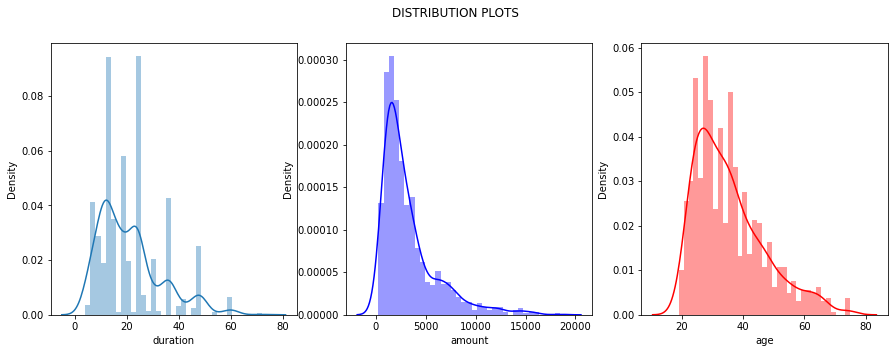

In [15]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
plt.suptitle('DISTRIBUTION PLOTS')
sns.distplot(df['duration'], bins=35, ax=ax[0]);
sns.distplot(df['amount'], bins=35, ax=ax[1], color='blue');
sns.distplot(df['age'], bins=35, ax=ax[2], color='red');

In [ ]:
From this visualization above, we can conclude that the duration and age features are positivelly skewed. The amount feature is not positively-skewed, though looks otherwise.  

Text(0.5, 1.0, 'Assigned Credibility by personal_status_sex')

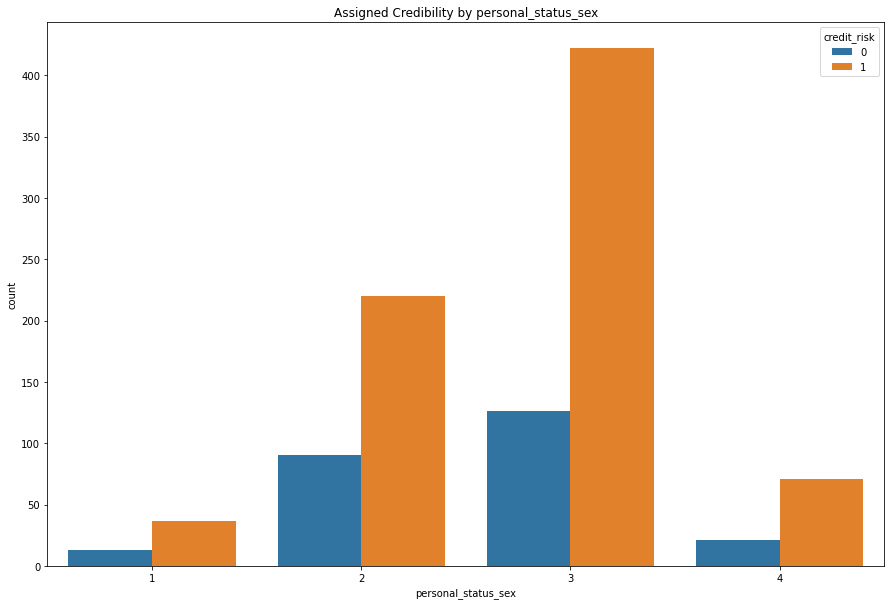

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(x = "personal_status_sex", hue = "credit_risk", data = df).set_title('Assigned Credibility by personal_status_sex')

Text(0.5, 1.0, 'Assigned Credibility by Job')

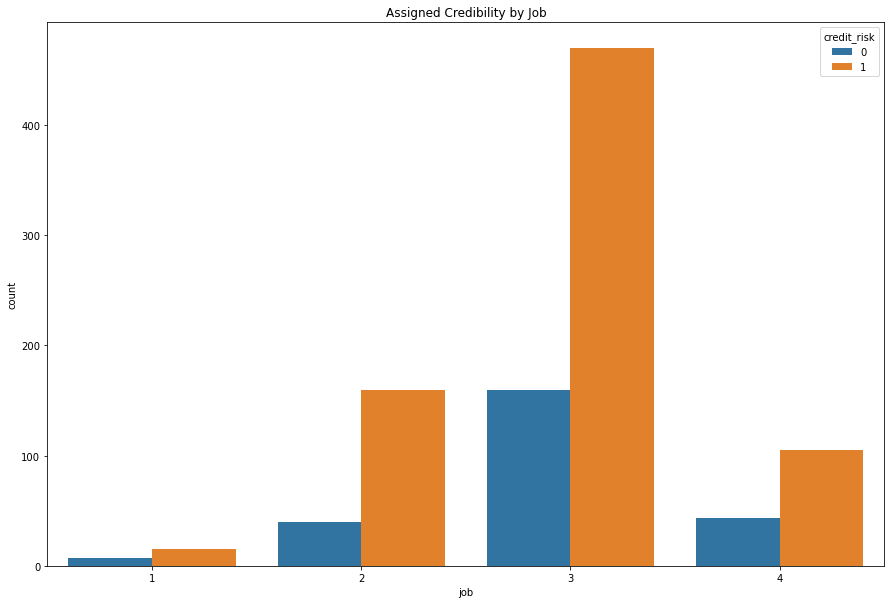

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(x = "job", hue = "credit_risk", data = df).set_title('Assigned Credibility by Job')

Text(0.5, 1.0, 'Assigned Credibility by Foreign_worker')

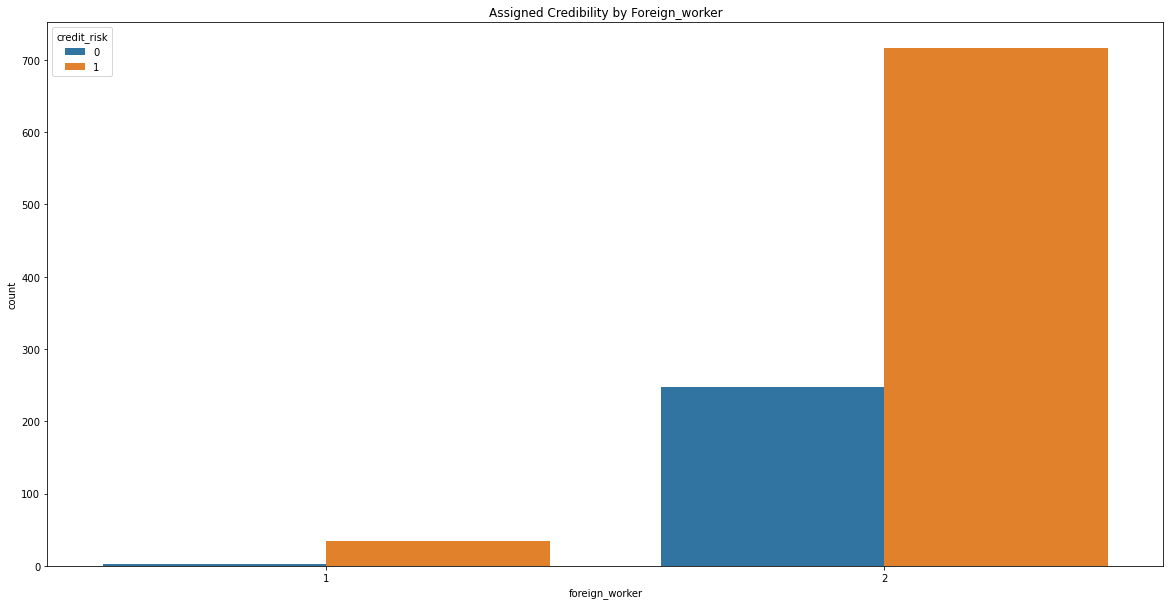

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(x = "foreign_worker", hue = "credit_risk", data = df).set_title('Assigned Credibility by Foreign_worker')

Text(0.5, 1.0, 'Assigned Credibility by Financial_dependency')

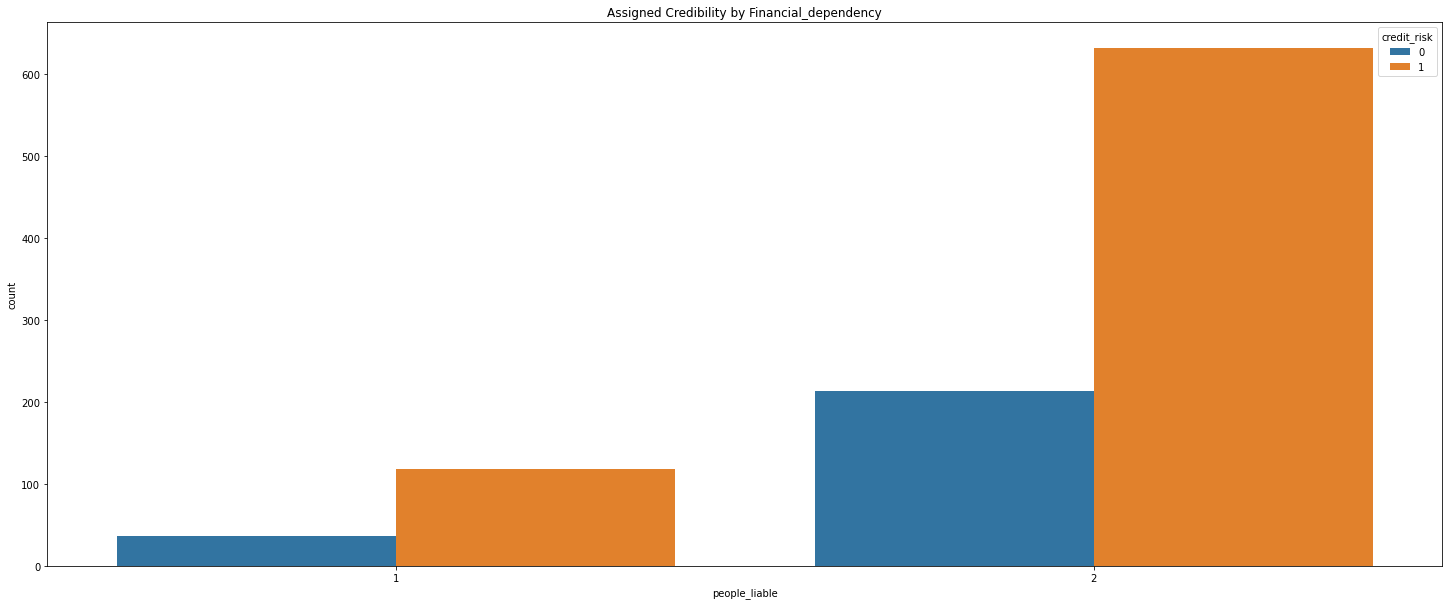

In [32]:
plt.figure(figsize=(25,10))
sns.countplot(x = "people_liable", hue = "credit_risk", data = df).set_title('Assigned Credibility by Financial_dependency')

Text(0.5, 1.0, 'Assigned Credibility by Gender')

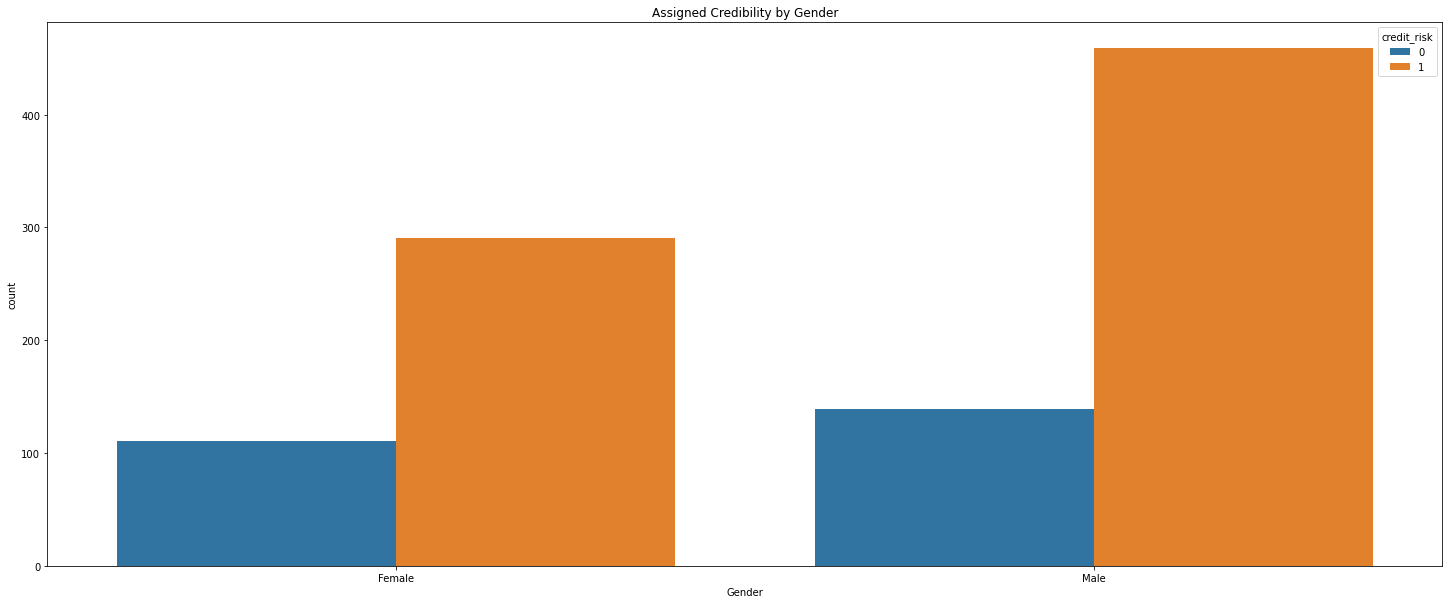

In [31]:
plt.figure(figsize=(25,10))
sns.countplot(x = "Gender", hue = "credit_risk", data = df).set_title('Assigned Credibility by Gender')

From the age and gender graph above, we can see that Algorithmic discrimination or predictive models can become unethical when they give certain privileged groups advantages while disadvantaging other underprivileged groups.

To explain this, let's see. **For gender**, we believe that men are privileged (and women are underprivileged). As can be seen in the plots generated above, women overall actually have a slightly greater rate of "good" creditworthiness than men (77% vs. 75%), though slightly less than "married" men (the male average is likely driven down by divorced and single men). However, we believe men to be privileged because of how much more prevalent they are in the dataset than women (comprising about 90% of the dataset), indicating that there could be some societal or legal factors discouraging women from seeking credit, despite the limited sample's comparable rate of "good" credit outcome. Further, the fact that gender is segmented further by marital status for men but not for women suggests that there may be additional limitations for women based on their marital status (for example, perhaps unmarried women are ineligible for credit).

**For age**, we believe individuals over age 25 are privileged (and individuals under age 25 are underprivileged). As can be seen in the plots above, young people are materially less likely to have a "good" creditworthiness rating than those older than 25 (65% vs. 77%), indicating that being young could place one at a disadvantage for obtaining credit.

Text(0.5, 1.0, 'Assigned Credibility by Age')

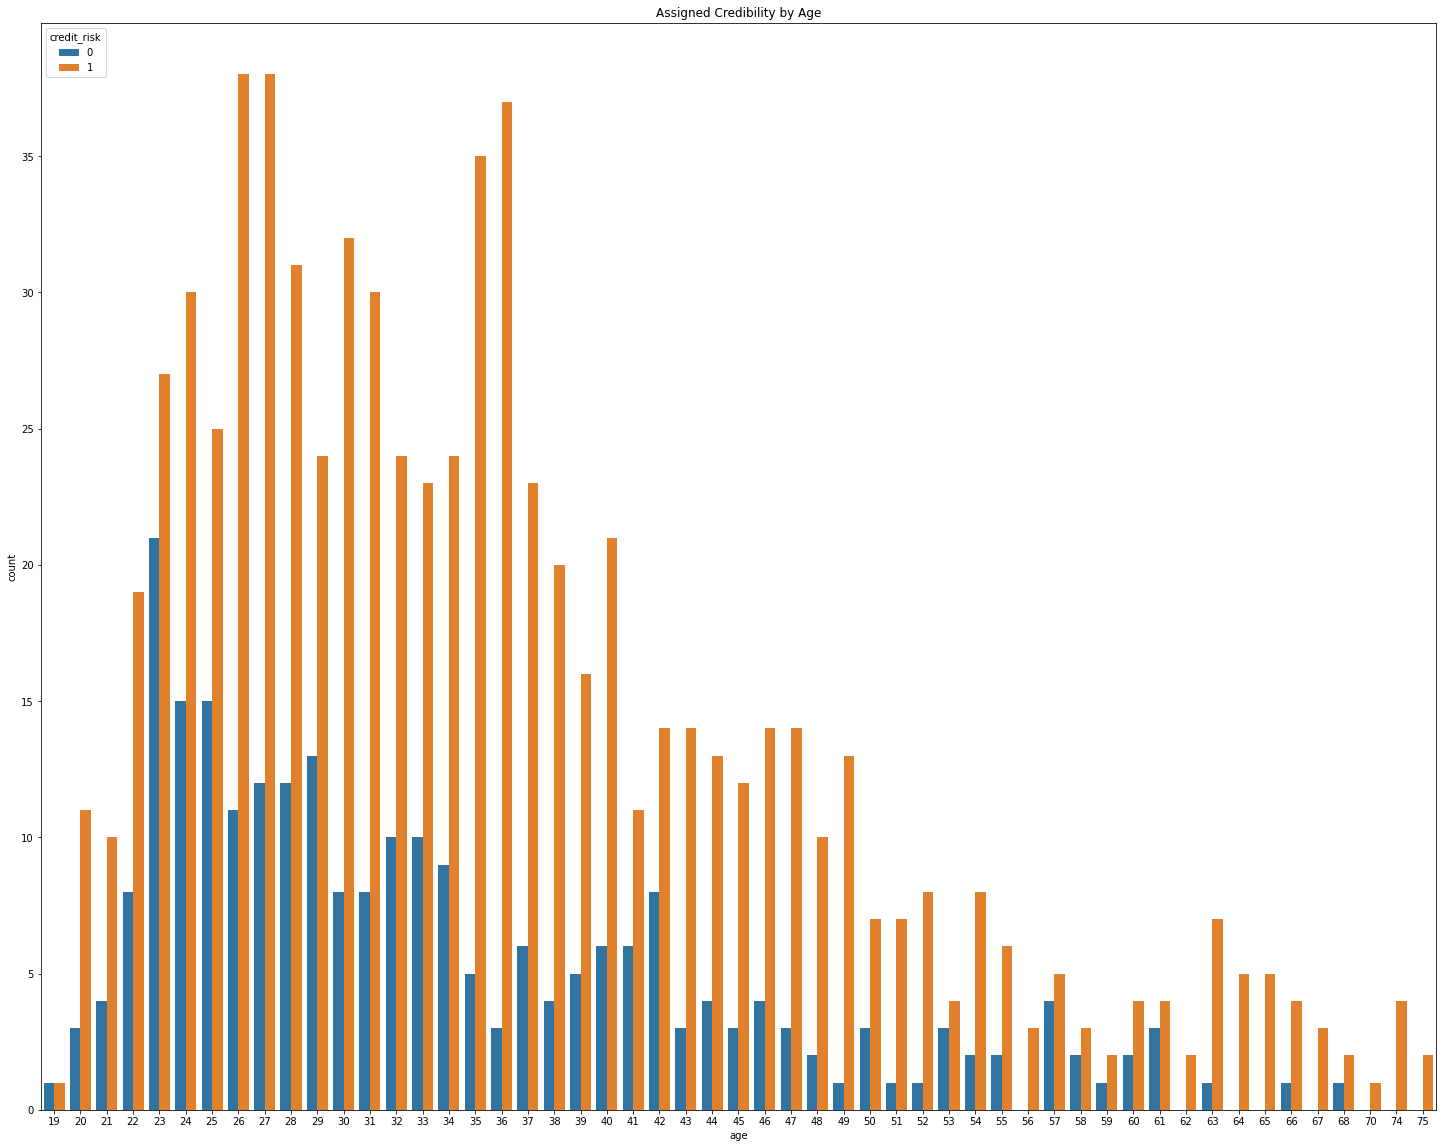

In [29]:
plt.figure(figsize=(25,20))
sns.countplot(x = "age", hue = "credit_risk", data = df).set_title('Assigned Credibility by Age')

When examining the age distribution through histograms, we see that it is right-skewed, and that the dataset mainly represents adults in their 20s - 40s, with a mean age of 35 and a median age of 33. We see in the overlapping histogram split on creditworthiness that lower ages (below 25) and higher ages (above 50) seem to have higher percentages of being considered not credit-worthy.
The dataset does not represent the population as a whole. Specifically, only 5% of the data are female entries! The dataset is skewed towards married men who are skilled workers.
Only 3.7% of the dataset were foreign workers; however, this is an interesting point of contention that will be discussed in more detail below, as this is a corrected summary statistic after a mistranslation of the dataset.
Only 16% of the dataset includes individuals with three or more dependents, meaning that individuals with few or no children are overrepresented in the data and parents of large families may be insufficiently represented.
Overall, this dataset is not representative of the South German population, but rather is representative of German working men in their 30s in the 1970s.

**In conclusion**, "If some group is a minority that only makes up 5% of the true distribution, then even sampling from the true data distribution will lead to a less robust model for this group." In this dataset, women presumably make up a minority of the true distribution, in part because of the historical bias noted above, so would be underrepresented in the ultimate dataset. Further, individuals under age 25 also make up only about 19% of observations. If a model is built on the entire dataset, it will underweight the relevant factors in the underrepresented groups as they will be "outvoted" by the data points from the overrepresented groups.